## Original Notebook

This notebook contains the original code from [the project we're aiming to extend](https://www.kaggle.com/code/kedarnathnaik/pneumonia-detection-using-logistic-regression/notebook), which was published under the *Apache License 2.0*.

It has been copied as-is with the only changes being in the comments used, that have been adapted to make the code easier to understand from our point of view.

Credits to [the original author](https://www.kaggle.com/kedarnathnaik).

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import cv2
import itertools

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [2]:
# Define function to extract features from an image 
def extract_hog_features(image):
    hog = cv2.HOGDescriptor()
    hog_features = hog.compute(image)
    return hog_features.flatten()

In [3]:
# Define function to retrieve data and labels from a directory
labels = ['PNEUMONIA', 'NORMAL']
img_size = 128

def get_data(dir):
    features_list = []
    labels_list = []
    for label in labels:
        path = os.path.join(dir, label)
        class_label = labels.index(label)
        for img_name in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img_arr, (img_size, img_size))
                hog_features = extract_hog_features(img_resized)
                features_list.append(hog_features)
                labels_list.append(class_label)
            except Exception as e:
                print(f"Error loading image {img_name}: {e}")
    return np.array(features_list), np.array(labels_list)

In [4]:
# Retrieve training and test data
train_features_array, train_labels_array = get_data('data/chest_xray/train')
test_features_array, test_labels_array = get_data('data/chest_xray/test')

print(f"Training features shape: {train_features_array.shape}")
print(f"Training labels shape: {train_labels_array.shape}")
print(f"Test features shape: {test_features_array.shape}")
print(f"Test labels shape: {test_labels_array.shape}")

Training features shape: (5216, 34020)
Training labels shape: (5216,)
Test features shape: (624, 34020)
Test labels shape: (624,)


In [5]:
# Define and train the model pipeline
lr_pipeline = Pipeline([
    ('pca', PCA(n_components=2100, random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

lr_pipeline.fit(train_features_array, train_labels_array)

,steps,"[('pca', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,n_components,2100
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10


In [6]:
# Compute predictions on test data and calculate accuracy
predictions = lr_pipeline.predict(test_features_array)
accuracy = accuracy_score(test_labels_array, predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7436


In [7]:
# Generate the classification report for the trained model
report = classification_report(test_labels_array, predictions, output_dict=True, zero_division=1)

report = pd.DataFrame(report).transpose()

print(report)

              precision    recall  f1-score    support
0              0.709854  0.997436  0.829424  390.00000
1              0.986842  0.320513  0.483871  234.00000
accuracy       0.743590  0.743590  0.743590    0.74359
macro avg      0.848348  0.658974  0.656648  624.00000
weighted avg   0.813725  0.743590  0.699842  624.00000


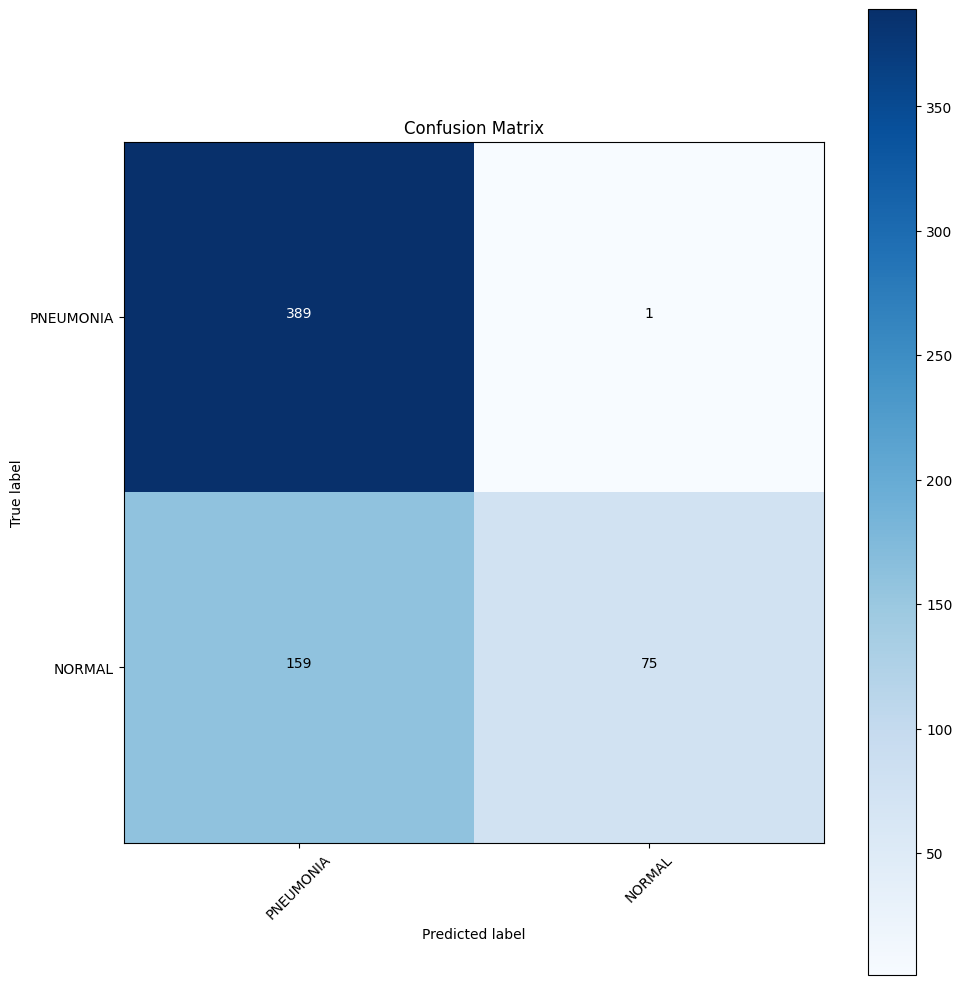

In [8]:
# Plot the confusion matrix for the trained model

cm = confusion_matrix(test_labels_array, predictions)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()